In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

#Explain the concept of batch normalization in the context of Artificial Neural Network

- Batch Normalization (BN) is a technique introduced to address the internal covariate shift problem in neural networks. The internal covariate shift refers to the change in the distribution of the input to a neural network's layer during training, which can slow down the convergence of the network.

- Main usage of batch normalization is that training become faster and less number of epochs are needed to reach to the convergence position

- Batch Normalization helps in reducing the internal covariate shift, allowing the network to converge faster during training. This is because it normalizes the input to a layer by adjusting the mean and standard deviation of the activations.

- Batch Normalization enables the use of higher learning rates, which can speed up the training process

- there are two ways in batch normalisation to normalise
  - first we normalise summation of weight z = w1x1 + w2x2 + w3x3  then put into activation function
  - second method we put z = w1x1 + w2x2 + w3x3 in activation function then normalize it
  -  in Batch Normalization every neuron contain  two trainable and two non trainable parameter

# Describe the benefits of using batch normalization during training

- Batch Normalization helps in reducing the internal covariate shift, leading to faster convergence during training.
- Batch Normalization enables the use of higher learning rates, which can speed up the training process
- Batch Normalization is versatile and can be applied to different types of neural network architectures, including fully connected layers, convolutional layers, and recurrent layers.
- Reduce Overfitting

#Q3 Discuss the working principle of batch normalization, including the normalization step and the learnable  parameters

Batch Normalization (BN) works by normalizing the input to a neural network layer during training. For each mini-batch, it computes the mean and standard deviation of the activations. The inputs are then normalized by subtracting the mean and dividing by the standard deviation. A scale and shift parameter, learned during training, are applied to allow the model to adapt the normalized values. This normalization step helps mitigate the internal covariate shift, leading to faster convergence and stable training. The learnable parameters (gamma and beta) enable the model to retain its representational capacity. Batch Normalization is applied independently to each feature, providing a consistent and adaptive normalization process across the entire network

### Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full) , (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
df = pd.DataFrame()
df["X_train"] = X_train_full.shape
df["X_test"] = X_test.shape
df

,X_train,X_test
0,60000,10000
1,28,28
2,28,28


In [5]:
X_valid,X_train = X_train_full[:5000]/225.0 , X_train_full[5000:]/225.0
y_valid ,y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255.

<Axes: >

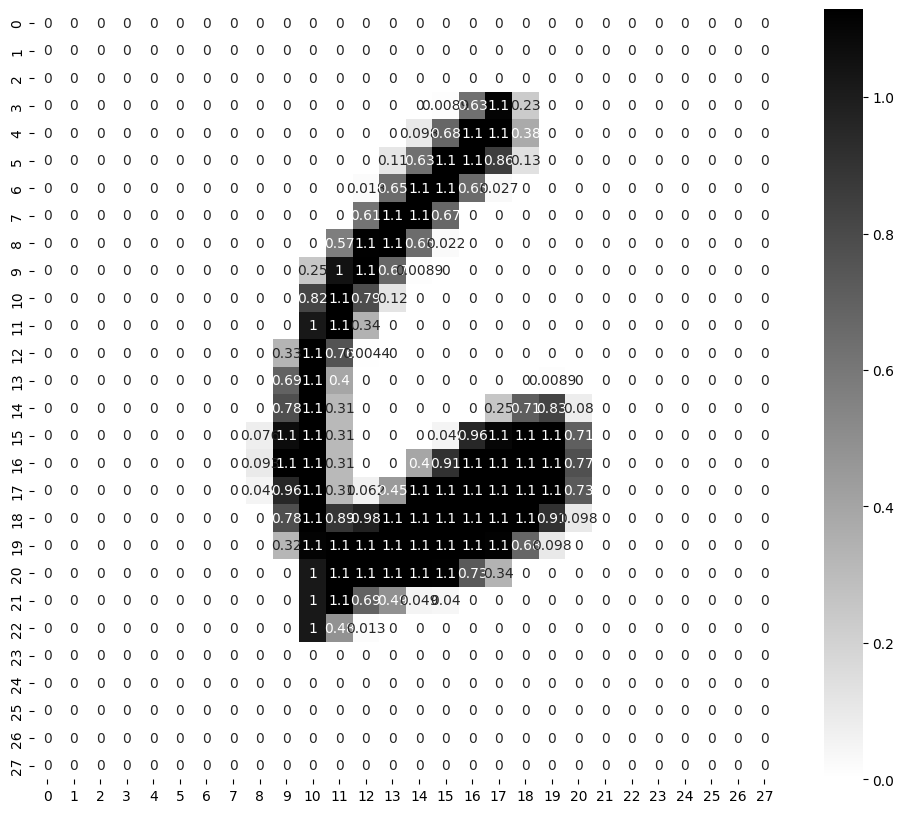

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train[3],annot=True,cmap="binary")

#### Implement a simple feedforward neural network using any deep learning framework/library

 Train the neural network on the chosen dataset without using batch normalization

In [10]:
layers = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="output")]
model_clf=tf.keras.models.Sequential(layers)
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
784*300+300

235500

In [17]:
LOSS = "sparse_categorical_crossentropy"
OPTIMIZER = "sgd"
model_clf.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=["accuracy"])

In [18]:
EPOCHS=20
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_test,y_test))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1417 - accuracy: 0.9599 - val_loss: 0.1509 - val_accuracy: 0.9590
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9646 - val_loss: 0.1394 - val_accuracy: 0.9602
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1148 - accuracy: 0.9673 - val_loss: 0.1257 - val_accuracy: 0.9649
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1044 - accuracy: 0.9707 - val_loss: 0.1183 - val_accuracy: 0.9669
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0952 - accuracy: 0.9730 - val_loss: 0.1131 - val_accuracy: 0.9682
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0875 - accuracy: 0.9757 - val_loss: 0.1059 - val_accuracy: 0.9704
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0804 - accuracy: 0.9776 - val_loss: 0.1046 - val_accuracy:

In [20]:
df1 = pd.DataFrame(history.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.141711,0.959855,0.150901,0.9590
1,0.126963,0.964618,0.139427,0.9602
2,0.114763,0.967345,0.125713,0.9649
3,0.104361,0.970673,0.118326,0.9669
4,0.095199,0.972964,0.113110,0.9682
5,0.087490,0.975691,0.105907,0.9704
6,0.080379,0.977636,0.104646,0.9702
7,0.074674,0.978927,0.100836,0.9722
8,0.068694,0.980782,0.093587,0.9737
9,0.063849,0.982655,0.090077,0.9755


<Axes: >

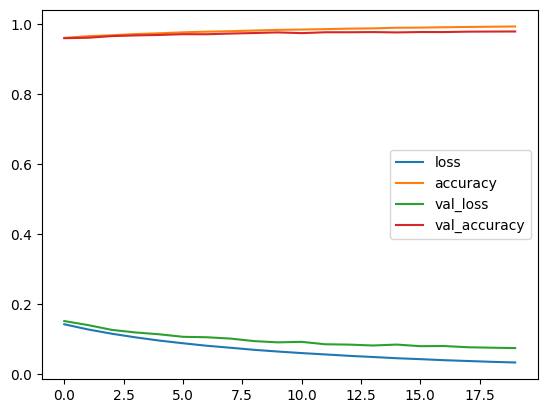

In [21]:
df1.plot()

In [19]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9781


[0.07361402362585068, 0.9781000018119812]

USING BATCH NORMALISATION

#### Implement batch normalization layers in the neural network and train the model againr

In [22]:
layers1 = [tf.keras.layers.Flatten(input_shape=[28,28]),
           tf.keras.layers.BatchNormalization(),
           tf.keras.layers.Dense(300,activation="relu"),
           tf.keras.layers.BatchNormalization(),
           tf.keras.layers.Dense(100,activation="relu"),
           tf.keras.layers.BatchNormalization(),
           tf.keras.layers.Dense(10,activation="softmax")]
model_clf1 = tf.keras.models.Sequential(layers1)
model_clf1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [33]:
print(f"Non-trainable parameter {(784*2*2+300*2*2+100*2*2)/2}")

Non-trainable parameter 2368.0


In [34]:
print(f"trainable parameter {271346-2368}")

trainable parameter 268978


In [35]:
LOSS = "sparse_categorical_crossentropy"
OPTIMIZER = "sgd"
model_clf1.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=["accuracy"])

In [36]:
EPOCHS=20
history1 = model_clf1.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_test,y_test))

Epoch 1/20
1719/1719 [==============================] - 15s 7ms/step - loss: 0.3574 - accuracy: 0.8938 - val_loss: 0.1963 - val_accuracy: 0.9435
Epoch 2/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1823 - accuracy: 0.9463 - val_loss: 0.1527 - val_accuracy: 0.9550
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1394 - accuracy: 0.9585 - val_loss: 0.1353 - val_accuracy: 0.9610
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1149 - accuracy: 0.9660 - val_loss: 0.1235 - val_accuracy: 0.9641
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.1162 - val_accuracy: 0.9662
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0830 - accuracy: 0.9753 - val_loss: 0.1123 - val_accuracy: 0.9673
Epoch 7/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.1082 - val_ac

In [39]:
df2 = pd.DataFrame(history1.history)
df2

,loss,accuracy,val_loss,val_accuracy
0,0.357444,0.893782,0.196261,0.9435
1,0.182285,0.946309,0.152716,0.9550
2,0.139440,0.958545,0.135292,0.9610
3,0.114859,0.966000,0.123473,0.9641
4,0.097929,0.970927,0.116232,0.9662
5,0.082996,0.975309,0.112320,0.9673
6,0.071374,0.978873,0.108195,0.9690
7,0.063198,0.981255,0.106181,0.9700
8,0.056973,0.982873,0.106635,0.9688
9,0.051387,0.985364,0.103758,0.9709


<Axes: >

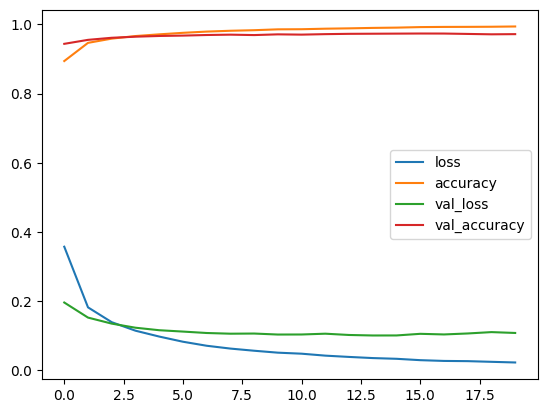

In [40]:
df2.plot()

Q5 Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalizationr

In [46]:
print(df1.tail(2))
print()
print()
print(df2.tail(2))

        loss  accuracy  val_loss  val_accuracy
18  0.034450  0.991691  0.074755        0.9779
19  0.032571  0.992400  0.073614        0.9781


        loss  accuracy  val_loss  val_accuracy
18  0.024950  0.992855  0.110770        0.9710
19  0.023051  0.993636  0.108316        0.9715


In [55]:
# plt.subplot(1,2,1)
# #the figure has 1 row, 2 columns, and this plot is the first plot.
# df1.plot()
# plt.subplot(1,2,2)
# #the figure has 1 row, 2 columns, and this plot is the second plot.
# df2.plot()
# plt.show()

<Figure size 1200x1000 with 0 Axes>

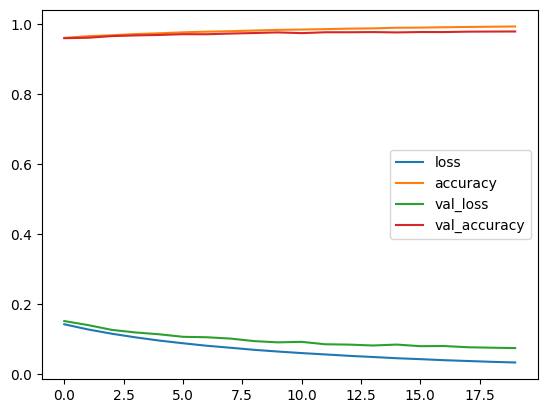

In [58]:
plt.figure(figsize=(12,10))
df1.plot()
plt.show()

<Figure size 1200x1000 with 0 Axes>

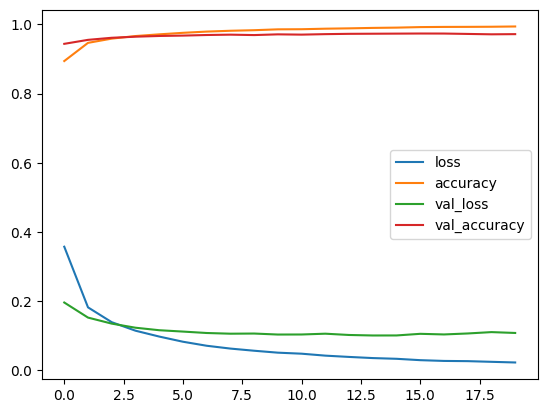

In [59]:
plt.figure(figsize=(12,10))
df2.plot()
plt.show()

####  Discuss the impact of batch normalization on the training process and the performance of the neural  network.

### Q3. Experimentation and AnalysisU
- Experiment with different batch sizes and observe the effect on the training
dynamics and model performancer
- Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks

In [64]:
batch_size=[32, 64, 128]

for batch in batch_size:
  history1 = model_clf1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=batch)
  print(f"Batch Size {batch}")
  print()
  print()


Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.1096 - val_accuracy: 0.9746
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.1114 - val_accuracy: 0.9742
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.1142 - val_accuracy: 0.9749
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.1158 - val_accuracy: 0.9742
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.1146 - val_accuracy: 0.9741
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.1131 - val_accuracy: 0.9752
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.1156 - val_ac

#### As Batch Size increases Accuracy of the model also increases

#Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

# Advantages
- Batch Normalization reduces internal covariate shift, leading to faster convergence during training.
- Batch Normalisation acts as a regularizer, reducing the risk of overfitting and improving the model's generalization on unseen data.
- Batch Normalization is versatile and can be applied to various types of neural network architectures, including convolutional, fully connected, and recurrent layers.

# Disadvange
- Batch Size Dependency Very small batch sizes may lead to inaccurate estimates of mean and variance
- Batch Normalization may not provide significant benefits on small datasets, and its application on such datasets may lead to overfitting due to the regularization effect.